# Crossvalidation

In [178]:
 # importando las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modelo
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

# para crosvalidation
from sklearn.model_selection import cross_val_score

# Seleccion de model0o 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

# ensamble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#curva de Aprendizaje
from sklearn.model_selection import learning_curve

# Para dividir los datos
from sklearn.model_selection import train_test_split

# para visualizacion de grafos
import graphviz
from sklearn.tree import export_graphviz

# optimizacion 
from sklearn.model_selection import GridSearchCV

In [103]:
# Indicar que la renderizacion de los graficos sea en el notebook
%matplotlib inline

# Establecer eltilo visual de los graficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style='darkgrid')

In [104]:
# cargar datos 
X = pd.read_csv('../data/processed/final_movies_imputados_df.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [105]:
scores = cross_val_score(Lasso(max_iter=100000), X, y, cv=5, scoring='r2')
scores

array([ 0.338918  ,  0.04043975,  0.01982357, -0.12980971, -1.37730718])

In [106]:
scores.mean()

-0.2215871128711206

Este puede tomarse como un valor mas cercano a la realidad. OSea, el modelo no esta sirviendo ni un poquito. 

In [107]:
# Ahora apliquemops lo mismo a un dataset con mejores features
# cargar datos 
X = pd.read_csv('../data/raw/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

scores = cross_val_score(Lasso(max_iter=100000), X, y, cv=5, scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [108]:
scores.mean()

0.44964021745791777

No es perfecto, pero es una mejora sustancial. 
Los nuevos datos a;aden informacion sobre las ventas en elo primer finm de semana y la cantidad de pantallas en las que se expuso. 

Datos de vital importancia en la industria del cine. 

# Seleccionando un nuevo modelo 

In [109]:
resultados = cross_validate(Lasso(max_iter=100000), X, y, return_train_score=True, cv=5)
resultados

{'fit_time': array([0.00350904, 0.08903694, 0.0507431 , 0.01918268, 0.02149677]),
 'score_time': array([0.00088596, 0.00071192, 0.00068188, 0.0005393 , 0.00042701]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [110]:
test_scores = resultados['test_score']
train_scores = resultados['train_score']
print(train_scores.mean())
print(test_scores.mean())

0.7491178363039036
0.44964021745791777


In [111]:
print(train_scores.mean())
print(test_scores.mean())

0.7491178363039036
0.44964021745791777


In [112]:
# Aplicando el otro modelo 
cross_validate(KNeighborsRegressor(), X, y, return_train_score=True, cv=5)

{'fit_time': array([0.00532198, 0.000808  , 0.00075102, 0.00236201, 0.00079513]),
 'score_time': array([0.00146699, 0.00150013, 0.00165081, 0.00421619, 0.00123072]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

In [113]:
n_vecinos = np.arange(2, 50, 2)

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, 
                                             param_name='n_neighbors', param_range=n_vecinos, cv=5)

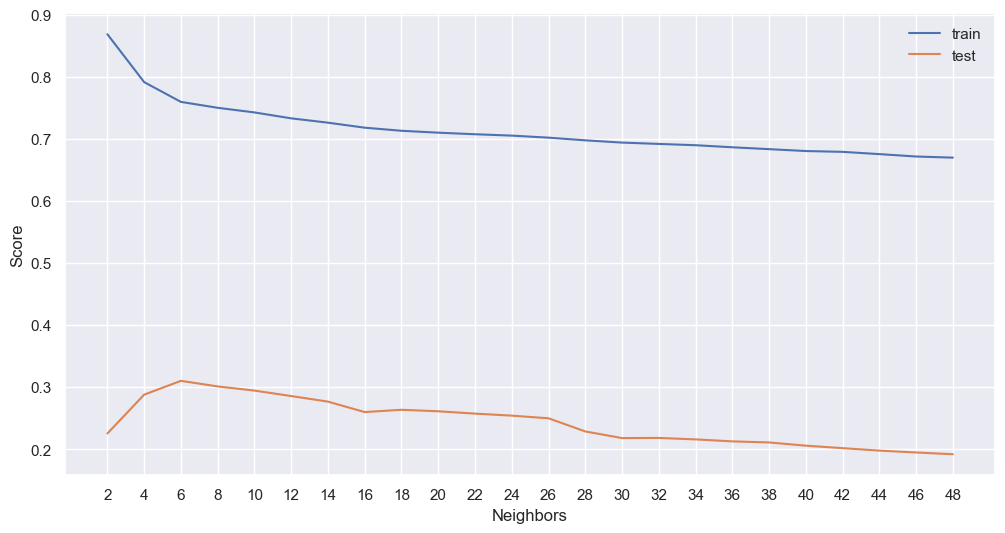

In [119]:
plt.figure(figsize=(12, 6))
sns.lineplot(np.mean(train_scores, axis=1), label='train') 
sns.lineplot(np.mean(test_scores, axis=1), label='test') 
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.xticks(np.arange(24), n_vecinos);

# Curva de Aprendizaje

In [122]:
# Elegimos 6 vecinos, basado en le grafico anterior
lc = learning_curve(KNeighborsRegressor(n_neighbors=6), X, y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

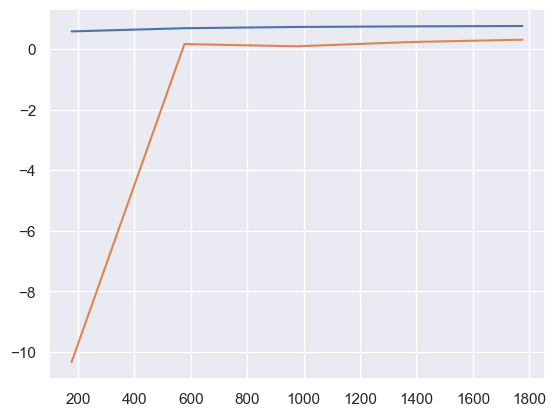

In [124]:
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))

(-0.2, 1.0)

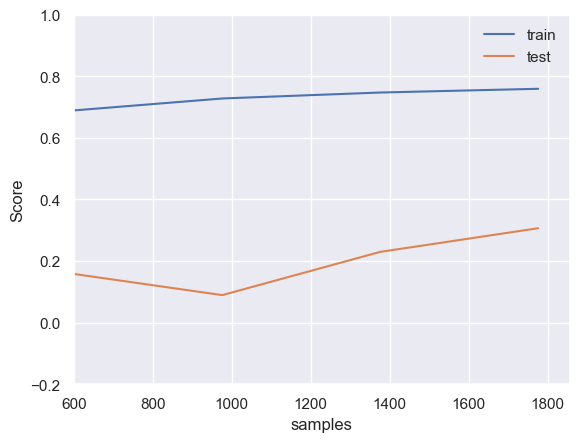

In [136]:
sns.lineplot(x=samples, y=np.mean(train, axis=1), label='train')
sns.lineplot(x=samples, y=np.mean(test, axis=1), label='test')
plt.xlabel('samples')
plt.ylabel('Score')
plt.xlim(600)
plt.ylim(-0.2, 1)

# Modelos de Ensamble 

In [160]:
model = DecisionTreeRegressor(max_depth=5)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [162]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [163]:
treedot = export_graphviz(model, out_file=None, feature_names=X.columns)

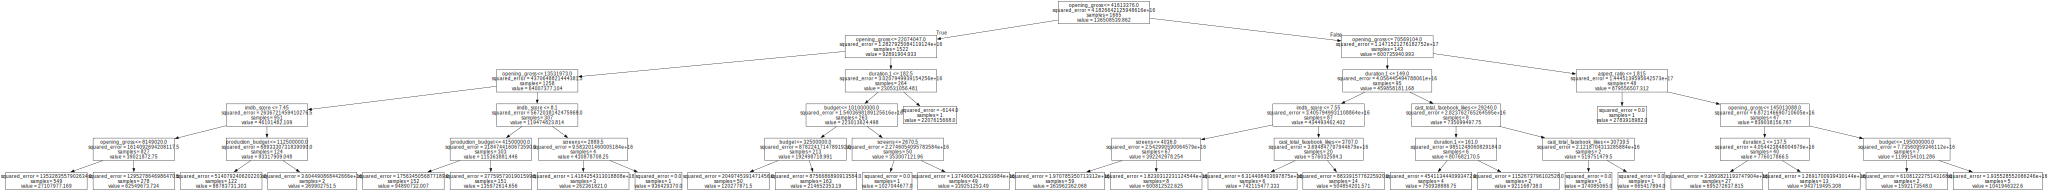

In [164]:
graphviz.Source(treedot)

## Random Forest

In [171]:
forest = RandomForestRegressor(200)
resultados = cross_validate(forest, X, y, cv=5, scoring='r2', return_train_score=True)
resultados

{'fit_time': array([1.25385332, 1.28172302, 1.30414295, 1.26835728, 1.2885952 ]),
 'score_time': array([0.00980091, 0.01109505, 0.01165795, 0.0115757 , 0.01063681]),
 'test_score': array([0.47113554, 0.69734535, 0.56655053, 0.45659791, 0.43312694]),
 'train_score': array([0.96185144, 0.97008555, 0.96580329, 0.96799439, 0.96715412])}

In [174]:
print(np.mean(resultados['train_score']))
print(np.mean(resultados['test_score']))

0.9665777576341418
0.5249512531164926


Ahora tenemos Overfitting.   
Ahora solo tendria que regularizar el modelo...
Pero voy a probar otro solo por probar

## Gradient Boosting Regressor

In [176]:
ensamble = GradientBoostingRegressor()
resultados = cross_validate(ensamble, X, y, cv=5, scoring='r2', return_train_score=True)

In [177]:
print(np.mean(resultados['train_score']))
print(np.mean(resultados['test_score']))

0.9151392143549633
0.5237072654021914


# Optimizacion Hyper-parametrica 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [187]:
param_test1 = {'n_estimators': range(20, 501, 20)}

In [191]:
estimador = GradientBoostingRegressor(learning_rate=0.1, 
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=8,
                                    max_features='sqrt',
                                    random_state=10)

In [192]:
gsearch1 = GridSearchCV(estimador,
                        param_grid=param_test1,
                        scoring='r2',
                        cv=5)

In [193]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10),
             param_grid={'n_estimators': range(20, 501, 20)}, scoring='r2')

In [196]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.01920919, 0.03702798, 0.05643334, 0.07688766, 0.09950213,
         0.11518583, 0.14038148, 0.15569239, 0.17689734, 0.19941988,
         0.23807006, 0.23875647, 0.26166301, 0.28129025, 0.30209007,
         0.32351975, 0.34583259, 0.36500607, 0.38573651, 0.40621519,
         0.42715454, 0.44846921, 0.46974516, 0.49404197, 0.51395979]),
  'std_fit_time': array([0.00144541, 0.00030712, 0.00099164, 0.00208509, 0.00253046,
         0.00207582, 0.00436067, 0.00210504, 0.0020739 , 0.00560193,
         0.03149638, 0.00236511, 0.00330251, 0.00289802, 0.00278522,
         0.0030761 , 0.00144799, 0.00412636, 0.005487  , 0.00544624,
         0.00615878, 0.00680321, 0.00694422, 0.01091238, 0.01125215]),
  'mean_score_time': array([0.00086741, 0.00086422, 0.00096025, 0.00114512, 0.00133486,
         0.0013464 , 0.001542  , 0.0015523 , 0.00167708, 0.00182028,
         0.00190649, 0.00200157, 0.00211868, 0.00221539, 0.00246534,
         0.00243039, 0.00255022, 0.00267878, 0.

In [199]:
final_results = cross_validate(gsearch1.best_estimator_, X_train, y_train, return_train_score=True)
final_results

{'fit_time': array([0.25550795, 0.24040508, 0.23989511, 0.23867488, 0.24347782]),
 'score_time': array([0.00199199, 0.00201106, 0.00193977, 0.00195003, 0.00196123]),
 'test_score': array([0.71304714, 0.77297121, 0.72821657, 0.68997226, 0.84204995]),
 'train_score': array([0.8427937 , 0.83683828, 0.84492792, 0.85778932, 0.82584246])}

In [201]:
print(np.mean(final_results['train_score']))
print(np.mean(final_results['test_score']))

0.8416383349940062
0.7492514246173502


# Modelos Final

In [202]:
estimador = GradientBoostingRegressor(learning_rate=0.1, 
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=8,
                                    max_features='sqrt',
                                    random_state=10,
                                    n_estimators=240)

In [204]:
estimador.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=240,
                          random_state=10)

In [205]:
estimador.score(X_test, y_test)

0.7973204914912453

POr fin, un buen score